In [1]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import time

from scipy.integrate import odeint, ode

from RungeKutta import *

import warnings

### Reading data

In [3]:
dir   = "DATA/"
file1 = 'BHBH.csv'
file2 = 'BHBHm.csv'

BHBH  = pd.read_csv(dir+file1)
BHBHm = pd.read_csv(dir+file2)

In [4]:
BHBH.head()

,ID,name,BWorldtime,Mass_0,Radius_0,Zams_0,Phase_0,RemnantType_0,Mass_1,Radius_1,...,GWtime,EventsAll,Events,EventsPlus,Mzams_0,Mzams_1,Semimajor_ini,Eccentricity_ini,Z,alpha
0,360308,0_792857804219921,5.411991,18.34303,0.000078,21.22227,7,6,21.09631,0.000090,...,9.974991e+04,RB01:RE:ehSt:RB13:RE:erSt,RB:RE:S:RB:RE:S,RB:RE:ehSt:RB:RE:erSt,41.0592,34.5745,24.874630,0.2619,0.0004,0.5
1,360337,0_285120263308905,4.134819,50.99943,0.000217,92.24360,7,6,51.78028,0.000220,...,5.611226e+16,hhS:hrS,S:S,hhS:hrS,92.2436,53.6410,81917.701038,0.3955,0.0004,0.5
2,360367,0_303570516402716,4.311590,33.98611,0.000144,41.10912,7,6,30.83786,0.000131,...,7.105206e+05,RB01:RE:RB03:RE:ehSt:RB13:RE:erSt,RB:RE:RB:RE:S:RB:RE:S,RB:RE:RB:RE:ehSt:RB:RE:erSt,74.5563,46.8471,127.422203,0.2217,0.0004,0.5
3,360429,0_321152334354104,5.738531,42.61480,0.000181,50.85000,7,6,33.31328,0.000141,...,1.212675e+07,RB04:hhS:RE:RB14:hrS,RB:S:RE:RB:S,RB:hhS:RE:RB:hrS,50.8500,32.3486,316.947946,0.0107,0.0004,0.5
4,360471,0_850952161687565,4.503749,49.74939,0.000211,65.22210,7,6,45.91471,0.000195,...,6.006609e+09,RB04:hhS:RE:RB16:hrS,RB:S:RE:RB:S,RB:hhS:RE:RB:hrS,65.2221,46.7855,1548.080290,0.0751,0.0004,0.5


Text(0.5, 1.0, 'alpha')

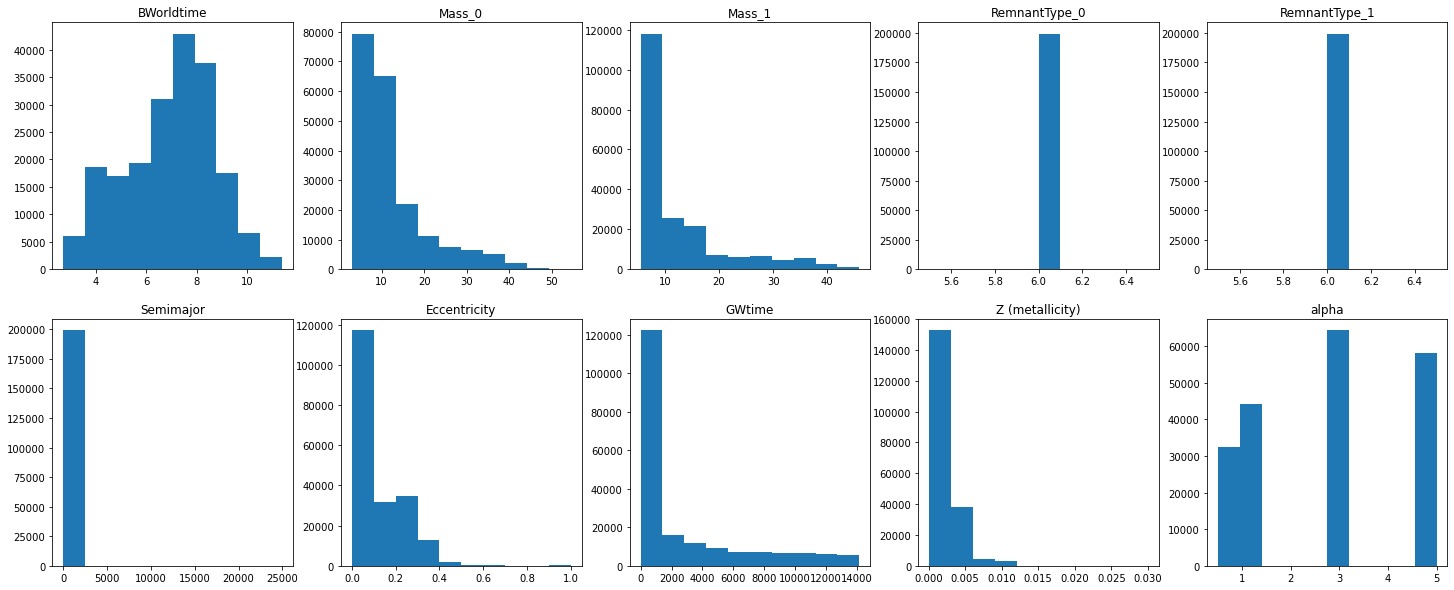

In [5]:
fig, ax = plt.subplots(ncols=5, nrows=2, figsize=(25, 10))

ax[0,0].hist(BHBHm.BWorldtime)
ax[0,0].set_title('BWorldtime')

ax[0,1].hist(BHBHm.Mass_0)
ax[0,1].set_title('Mass_0')

ax[0,2].hist(BHBHm.Mass_1)
ax[0,2].set_title('Mass_1')

ax[0,3].hist(BHBHm.RemnantType_0)
ax[0,3].set_title('RemnantType_0')

ax[0,4].hist(BHBHm.RemnantType_1)
ax[0,4].set_title('RemnantType_1')

ax[1,0].hist(BHBHm.Semimajor)
ax[1,0].set_title('Semimajor')

ax[1,1].hist(BHBHm.Eccentricity)
ax[1,1].set_title('Eccentricity')

ax[1,2].hist(BHBHm.GWtime)
ax[1,2].set_title('GWtime')

ax[1,3].hist(BHBHm.Z)
ax[1,3].set_title('Z (metallicity)')

ax[1,4].hist(BHBHm.alpha)
ax[1,4].set_title('alpha')

### Integration of the system of differential Equations

Here the functions in RungeKutta.py are used: the method uses a 4th order Runge-Kutta method.

#### Fixed Time-Steps

In [38]:
start_time = time.time()

TMIN = 0;  TMAX = 13 # s
a0   = 56;   e0 = .02
#initial_state = (a0, e0)
NSTEPS        = int(1e6)

# just for the try
M1, M2 = BHBH[['Mass_0', 'Mass_1']].iloc[0]

# time step
h = ( TMAX - TMIN ) / (NSTEPS - 1.)
# time grid
t = np.linspace(TMIN, TMAX, NSTEPS)

a, e = (np.zeros(shape=NSTEPS) for i in range(N))

# first values from the table
a[0] = a0
e[0] = e0

for i in range(NSTEPS-1):
    yin    = [a[i], e[i]]
    yout   = ODE_RK( t[i], yin, h, M2, M1 )
    a[i+1] = yout[0]
    e[i+1] = yout[1]

print("number of steps: %s"  % NSTEPS)
print("Zeroing Time-Step: %s"  % list(x <= 0 for x in a).index(True))
print("runtime: %s seconds" % (time.time() - start_time))

number of steps: 1000000
Zeroing Time-Step: 966712
runtime: 53.326804399490356 seconds


In [193]:
print("Time instant in which the Semimajor axis goes to 0:\t\t",    t[a<=0][0])
# print("Time instant in which the Eccentricity axis goes to 0:\t\t", t[e<=0][0])

Time instant in which the Semimajor axis goes to 0:		 12.567268567268567


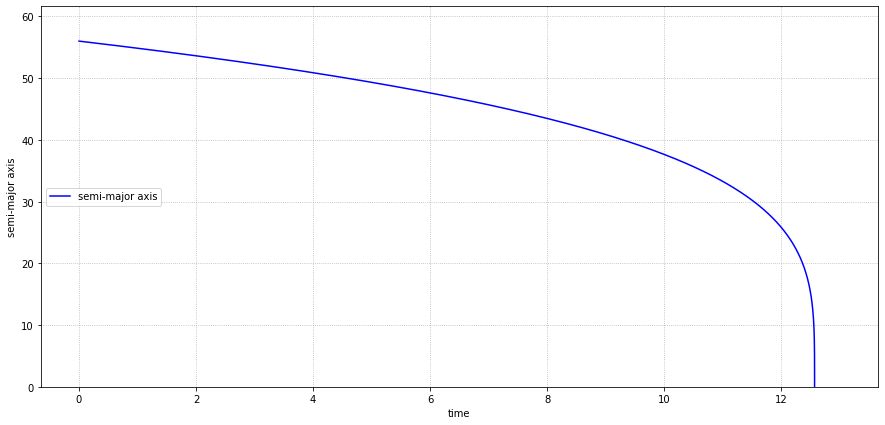

In [194]:
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(t,a,'b-',  label='semi-major axis')
ax.set_ylabel('semi-major axis')
ax.set_xlabel('time')
ax.legend(loc='center left')
ax.grid(ls='dotted')
ax.set_ylim(bottom=0)

# ax_ = ax.twinx()
# ax_.plot(t,e,'r--', label='eccentricity')
# ax_.set_ylabel('eccentricity')
# ax_.legend(loc='center right')
# ax_.set_ylim(bottom=0)
plt.show()

#### Adaptive Time-Steps

In [81]:
def adaptive_h(h,a, case):
    if case==0: 
        time_step = h0* (a[i]/a[i-1])    #can be h[i] or h[0]
    elif case==1: 
        time_step = h[i-1]* (a[i]/a[i-1])    #can be h[i] or h[0]
    return(time_step) 

In [93]:
start_time = time.time()

TMIN = 0;  TMAX = 13 # s
a0   = 56;   e0 = .02
#initial_state = (a0, e0)
NSTEPS        = int(1e6)

# just for the try
M1, M2 = BHBH[['Mass_0', 'Mass_1']].iloc[0]

#initial time step
h0= 1/10000 * ( TMAX - TMIN )

#initial time
t0 = TMIN

a, e = (np.zeros(shape=NSTEPS) for i in range(N))
t = np.zeros(shape=NSTEPS)
h = np.zeros(shape=NSTEPS)

# first values from the table
a[0] = a0
e[0] = e0
h[0] = h0
t[0] = TMIN
  
i= 0
while a[i] > 0:
    yin    = [a[i], e[i]]
    if i > 0: h[i] = adaptive_h(h,a,case = 1)
    yout   = ODE_RK(t[i], yin, h[i], M2, M1 )
    a[i+1] = yout[0]
    t[i+1] = t[i] + h[i]
    i+=1

zero_index = list(x <= 0 for x in a).index(True)
print("number of steps: %s"  % NSTEPS)
print("Zeroing Time-Step: %s"  % zero_index)
print("runtime: %s seconds" % (time.time() - start_time))

number of steps: 1000000
Zeroing Time-Step: 12907
runtime: 2.886336088180542 seconds


In [94]:
print("Time instant in which the Semimajor axis goes to 0:\t\t",    t[a<=0][0])
# print("Time instant in which the Eccentricity axis goes to 0:\t\t", t[e<=0][0])

Time instant in which the Semimajor axis goes to 0:		 12.585648216631787


(0.0, 58.856938859248146)

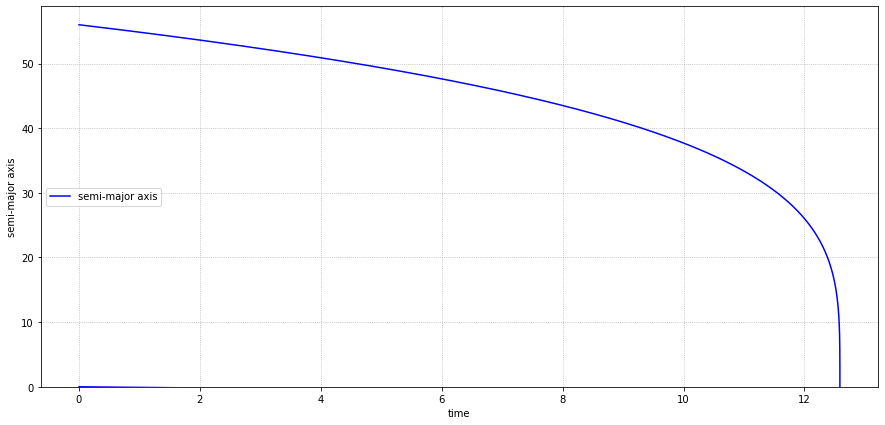

In [95]:
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(t,a,'b-',  label='semi-major axis')
ax.set_ylabel('semi-major axis')
ax.set_xlabel('time')
ax.legend(loc='center left')
ax.grid(ls='dotted')
ax.set_ylim(bottom=0)

(0.0001, 0.0006)

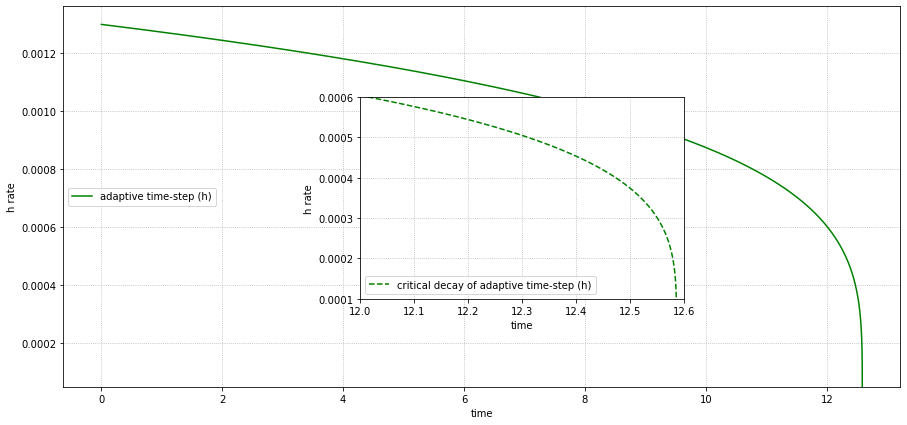

In [118]:
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(t[:zero_index],h[:zero_index],'-g',markersize=1, color ='green',  label='adaptive time-step (h)')
ax.set_ylabel('h rate')
ax.set_xlabel('time')
ax.legend(loc='center left')
ax.grid(ls='dotted')
ax.set_ylim(bottom=min(h[:zero_index]))

axes = plt.axes( [ 0.4, 0.3, 0.3, 0.4 ] )
axes.plot(t[:zero_index],h[:zero_index],'--g',markersize=1, color ='green', label='critical decay of adaptive time-step (h)')
axes.set_ylabel('h rate')
axes.set_xlabel('time')
axes.legend(loc='best')
axes.grid(ls='dotted')
axes.set_xlim(12,12.6)
axes.set_ylim(0.0001, 0.0006)

In [119]:
print("time-step lower bound %s:"% np.min(h[np.nonzero(np.abs(h))]))
print("time-step upper bound %s:"% np.max(h[np.nonzero(np.abs(h))]))

time-step lower bound 5.003705612732309e-05:
time-step upper bound 0.0013000000000000002:


In [7]:
initial_state = (a0, e0)

# definining another function to swap t and y
# to fit the needs of scipy.odeint
def system_ODE(curr_state, t, M, m):
    return deriv( t, curr_state, M, m )

z = odeint(system_ODE, initial_state, t, args=(M2, M1))

# the warnings are about the steps in which a and e get negative:
# an exit condition should be done when a,e<0

 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1256725407990D+02   r2 =  0.2202092418424D-15
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1256725407990D+02   r2 =  0.2202092418424D-15
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1256725407990D+02   r2 =  0.2202092418424D-15
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1256725407990D+02   r2 =  0.2202092418424D-15
 lsoda--  warning..internal t (=r1) 

/home/aidin/anaconda3/lib/python3.8/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


90D+02   r2 =  0.2202092418424D-15
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1256725407990D+02   r2 =  0.4404184836848D-15
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1256725407990D+02   r2 =  0.4404184836848D-15
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1256725407990D+02   r2 =  0.4404184836848D-15
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1256725407990D+02   r2 =  0.4404184836848D-15
 

In [14]:
print("Time instant in which the Semimajor axis goes to 0:\t\t",    t[z[:,0]<=0][0])
print("Time instant in which the Eccentricity axis goes to 0:\t\t", t[z[:,1]<=0][0])

Time instant in which the Semimajor axis goes to 0:		 12.567255567255568
Time instant in which the Eccentricity axis goes to 0:		 12.567255567255568


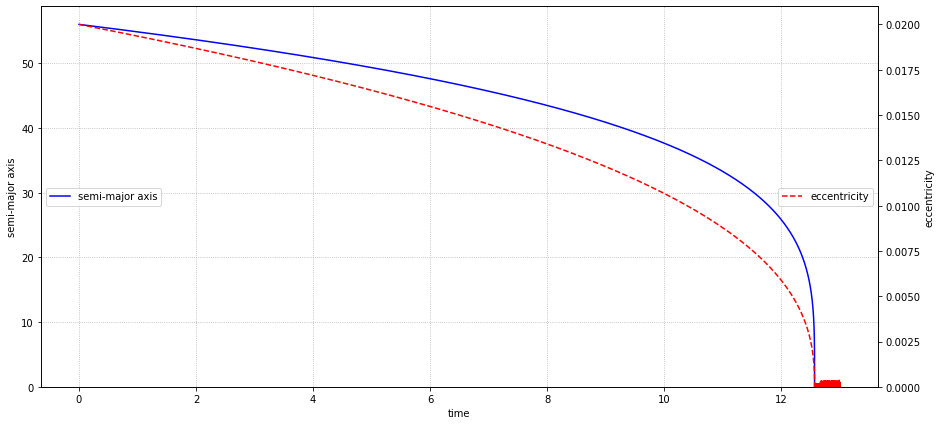

In [8]:
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(t,z[:,0],'b-',  label='semi-major axis')
ax.set_ylabel('semi-major axis')
ax.set_xlabel('time')
ax.legend(loc='center left')
ax.grid(ls='dotted')
ax.set_ylim(bottom=0)

ax_ = ax.twinx()
ax_.plot(t,z[:,1],'r--', label='eccentricity')
ax_.set_ylabel('eccentricity')
ax_.legend(loc='center right')
ax_.set_ylim(bottom=0)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

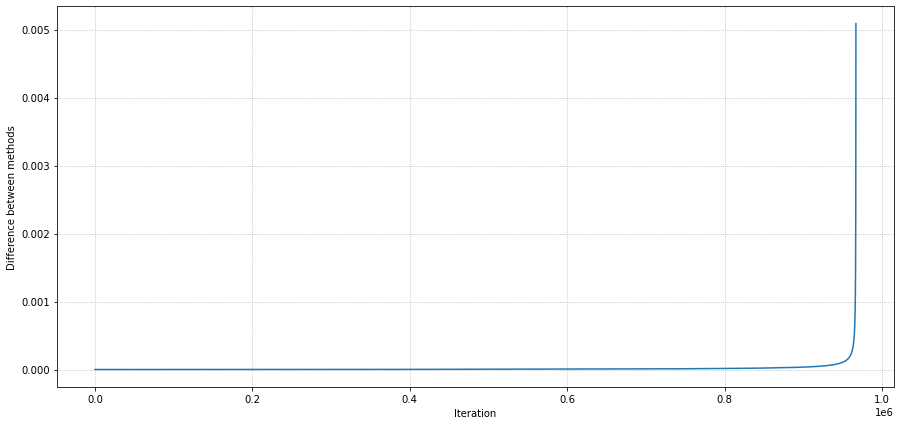

In [16]:
'''
Difference between semimajors computed with user provided script and
the scipy function odeint
'''

# index in which a gets negative
idx = list(x <= 0 for x in a).index(True)
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(a[:idx-100]-z[:idx-100,0])
ax.set_ylabel('Difference between methods')
ax.set_xlabel('Iteration')
ax.grid(ls='dotted')
plt.show

In [17]:
print('Delay time tabulated:\t\t', BHBH['GWtime'].iloc[0])

Delay time tabulated:		 99749.91


In [ ]:
# Using the function ode (to allow implementing an exit condition)
# One could work on the integration methods using
# .set_integrator(name, **integrator params)

M1, M2 = BHBH[['Mass_0', 'Mass_1']].iloc[0]
initial_state = (a0, e0)

r = ode(deriv)
r.set_initial_value(initial_state)
r.set_f_params(M1, M2)
t1 = TMIN
dt = h

while r.successful() and r.y[0] > 0 and r.y[1] > 0:
    r.integrate(r.t+dt)

print("final", r.t)

In [18]:
# Sequential computation of the delay time for each entry:
# it takes too long with an user provided script

BHBHm = BHBHm.head(10)

h = ( TMAX - TMIN ) / (NSTEPS - 1.)
t = np.linspace(TMIN, TMAX, NSTEPS)

# delay = np.zeros(shape=len(BHBHm.index))

def delay_time(row, h, t):
    M1 = row.Mass_0
    M2 = row.Mass_1

    #a, e = (np.zeros(shape=NSTEPS) for i in range(N))
    a = row.Semimajor
    e = row.Eccentricity

    for i in range(NSTEPS-1):
        a, e = ODE_RK( t[i], [a, e], h, M2, M1 )
        if a <= 0 and e <= 0:
            break

    return t[i]

delay = BHBHm.apply(func=delay_time, axis='columns', args=(h, t))


/mnt/ec7a34b1-b7a6-4fbd-911d-c2a973711577/University/Laboratory_of_Computational_Physics/MOD.B/project/Delay-Time-Dist.-of-Compact-Binary-Objects/RungeKutta.py:31: RuntimeWarning: invalid value encountered in double_scalars
  dydx[0] = -64/5   *     G**3*M*m*(M+m)/(c**5*a**3*(1-e**2)**(7/2)) * (1 +  73/ 24*e**2 + 37/96*e**4)
/mnt/ec7a34b1-b7a6-4fbd-911d-c2a973711577/University/Laboratory_of_Computational_Physics/MOD.B/project/Delay-Time-Dist.-of-Compact-Binary-Objects/RungeKutta.py:32: RuntimeWarning: invalid value encountered in double_scalars
  dydx[1] = -304/15 * e * G**3*M*m*(M+m)/(c**5*a**4*(1-e**2)**(5/2)) * (1 + 121/304*e**2             )


In [37]:
# Sequential computation of the delay time for each entry:
# using odeint

BHBHm = BHBHm.head(1000)

# delay = np.zeros(shape=len(BHBHm.index))

def delay_time(row, h, t):

    # Masses and initial conditions
    M1 = row.Mass_0
    M2 = row.Mass_1

    a = row.Semimajor
    e = row.Eccentricity

    z = odeint(system_ODE, (a,e), t, args=(M2, M1))

    # return time only if it exists
    try:
        return (t[z[:,0]<=0][0], t[z[:,1]<=0][0])
    except:
        try:
            return (t[z[:,0]<=0][0], -1)
        except:
            try:
                return (-1, t[z[:,1]<=0][0])
            except:
                return (-1, -1)

warnings.filterwarnings("ignore")
delay = BHBHm.apply(func=delay_time, axis='columns', args=(h, t))
delay

 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.2785906387266D-01   r2 =  0.1166126446305D-17
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.2785906387266D-01   r2 =  0.1166126446305D-17
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.2785906387266D-01   r2 =  0.7742661122132D-18
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.2785906387266D-01   r2 =  0.7742661122132D-18
 lsoda--  warning..internal t (=r1) 

0      (1.7859027859027858, 1.7923507923507924)
1      (1.7859027859027858, 1.7923507923507924)
2        (1.7859027859027858, 0.98993798993799)
3      (1.7859027859027858, 1.7923507923507924)
4      (1.7859027859027858, 1.7923507923507924)
                         ...                   
995    (1.7414817414817414, 1.6473616473616475)
996    (1.7414817414817414, 1.1100581100581102)
997    (1.7414817414817414, 1.5588445588445587)
998    (1.7859027859027858, 1.7923507923507924)
999    (1.7859027859027858, 1.7923507923507924)
Length: 1000, dtype: object

pandas.core.series.Series